PCA for dimentionality reduction

PCA are linear transformation methods. PCA yields the directions (principal components) that maximize the variance of the data.m

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## PCA on fake data

In [2]:
data = sio.loadmat('./data/ex7data1.mat')

In [3]:
X = data['X']
X.shape

(50, 2)

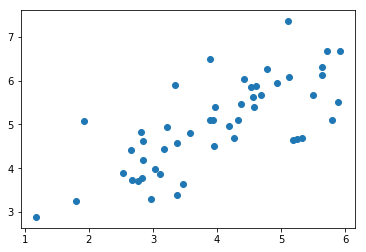

In [4]:
fig, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1])
plt.show()

In [5]:
def feature_normalize(X):
    return (X - X.mean(axis=0)) / X.std(axis=0)

In [6]:
# check 
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
(X_std - feature_normalize(X)).sum()

0.0

In [7]:
def covariance(X):
    m,n = X.shape
    return 1/m * X.T @ X

In [8]:
def _PCA(X):
    X = covariance(X)
    eigenval, eigenvect = np.linalg.eig(X)
    return eigenval, eigenvect

Numpy eigenvalues and vectors; https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.eig.html

In [9]:
X_norm = feature_normalize(X)

In [10]:
v, u = _PCA(X_norm)

In [11]:
print('eigenvectors:')
print(u)
print('eigenvalues:', v)

eigenvectors:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
eigenvalues: [1.73553038 0.26446962]


Let's plot the principal components

In [12]:
# direction seems correct but not length..

[3.98926528 5.00280585]
[1.2272053 1.2272053]
[-0.18700826  0.18700826]


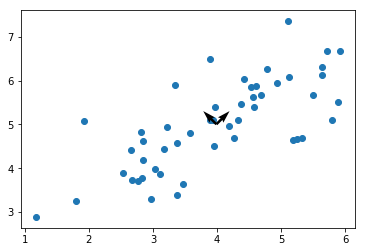

In [13]:
fig, ax = plt.subplots()

ax.scatter(X[:,0], X[:,1])

origin = X.mean(axis=0)
print(origin)

vector1 = v[0] * u[:,0]
print(vector1)

vector2 = v[1] * u[:,1]
print(vector2)

ax.quiver(origin[0], origin[1], vector1[0], vector1[1])
ax.quiver(origin[0], origin[1], vector2[0], vector2[1])

plt.show()

Let's project the data from 2D to 1D

In [14]:
z = X_norm @ u[:,:]
print('z', z.shape)
print('z0', z[0])

z (50, 2)
z0 [-1.49631261 -0.75623618]


Let's reconstruct the data

In [17]:
X_recontruct = z @ u[:,:]
print(X_recontruct.shape)

(50, 2)


Quick check with Scikit library

In [18]:
pca = PCA(n_components=2)
pca.fit(feature_normalize(X))

print(pca.explained_variance_)  
print(pca.components_)
print(pca.singular_values_)  

[1.77094936 0.26986696]
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[9.3153915  3.63641048]


In [19]:
X_pca = pca.transform(feature_normalize(X))
X_pca[0]

array([ 1.49631261, -0.75623618])

In [20]:
z = np.dot(feature_normalize(X),  pca.components_.T)
z[0]

array([ 1.49631261, -0.75623618])

## PCA on face

In [21]:
data = sio.loadmat('./data/ex7faces.mat')

In [22]:
X = data['X']
X.shape

(5000, 1024)

In [23]:
X_std = StandardScaler().fit_transform(X)
X_std.mean(), X_std.std()

(-7.16163239822265e-18, 1.0)

We are working with 32 * 32 pixels images that are represented by 1024 dimensions

In [24]:
def show_image(X, pixels):
    X = X.reshape((pixels, pixels), order='F')
    plt.imshow(X, cmap='gray')
    plt.show()

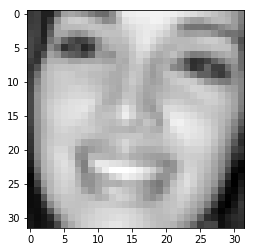

In [25]:
show_image(X[30], 32)

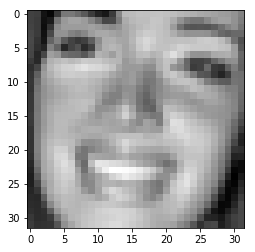

In [26]:
show_image(X_std[30], 32)

Let's reduce the 1024 dimension to 100

In [27]:
pca = PCA(n_components=100)
pca.fit(X_std)

if False:
    print(pca.explained_variance_)  
    print(pca.explained_variance_ratio_)
    print(pca.components_)
    print(pca.singular_values_)  

Let's visualise the first dimensation

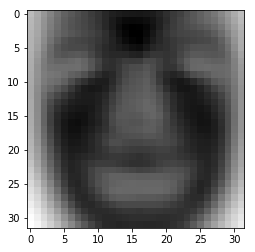

In [28]:
show_image(pca.components_[0], 32)

Let's reduce the original data

In [29]:
Xreduced = pca.transform(X_std)
Xreduced.shape

(5000, 100)

Let's reconstruct the data

In [30]:
Xreconstructed = Xreduced @ pca.components_
Xreconstructed.shape

(5000, 1024)

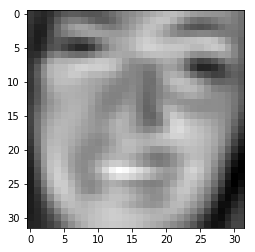

In [31]:
show_image(Xreconstructed[30], int(1024**0.5))

(1024, 1024)


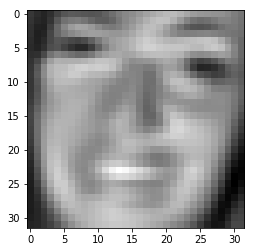

In [33]:
# quick test with my code
X_norm = feature_normalize(X)
u, v = _PCA(X_norm)
print(v.shape)
X_reduced = X_norm @ v[:,0:100]
X_recontruct = X_reduced @ v[:,0:100].T
show_image(X_recontruct[30], int(1024**0.5))